#POPULATION PREDICTION

**IMPORT LIBRARIES**

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**LOADING THE DATA**

In [20]:
df = pd.read_csv('population.csv')

**EXPLORATORY DATA ANALYSIS**


In [21]:
df.head()

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
0,2050,0.23,3711367,NaN,38.1,2.24,551,53.5,876613025,16.84,9735033990,1,1639176033
1,2045,0.35,5585537,-414772.0,36.6,2.24,545,50.1,811749463,17.09,9481803274,1,1620619200
2,2040,0.50,7793541,-415736.0,35.0,2.24,536,46.7,744380367,17.31,9198847240,1,1592691513
3,2035,0.66,10016298,-415732.0,33.3,2.24,523,43.5,675456367,17.48,8887524213,1,1553723810
4,2030,0.80,11726140,-440124.0,31.7,2.24,506,40.4,607341981,17.59,8548487400,1,1503642322


In [22]:
df.shape

(24, 13)

In [23]:
df.isnull().sum()

Year                             0
Yearly % \nChange                0
Yearly\nChange                   0
Migrants (net)                   1
Median Age                       0
Fertility Rate                   0
Density (P/Km²)                  0
Urban\nPop %                     0
Urban Population                 0
Country's Share of\nWorld Pop    0
World Population                 0
India\nGlobal Rank               0
Population                       0
dtype: int64

In [24]:
df.describe()

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,India\nGlobal Rank,Population
count,24.000000,24.000000,2.400000e+01,23.000000,24.000000,24.000000,24.000000,24.00000,2.400000e+01,24.000000,24.000000,2.400000e+01
mean,2005.000000,1.412917,1.286815e+07,-252570.869565,25.962500,3.479583,374.583333,31.53750,3.881687e+08,16.776250,1.791667,1.113504e+09
std,27.489128,0.666897,4.239948e+06,286175.441586,5.752188,1.447566,136.433745,10.10806,2.378749e+08,1.098227,0.414851,4.058605e+08
min,1955.000000,0.230000,3.711367e+06,-532687.000000,19.300000,2.240000,138.000000,17.60000,7.195850e+07,14.780000,1.000000,4.098806e+08
25%,1983.750000,0.995000,9.941006e+06,-500592.000000,20.675000,2.240000,256.750000,23.97500,1.829768e+08,15.995000,2.000000,7.630082e+08
50%,2012.500000,1.335000,1.387048e+07,-414772.000000,25.950000,2.600000,428.000000,31.75000,4.049070e+08,17.255000,2.000000,1.272217e+09
75%,2021.250000,2.010000,1.565104e+07,-25972.500000,28.800000,4.752500,469.500000,35.65000,4.980096e+08,17.702500,2.000000,1.396256e+09
max,2050.000000,2.330000,1.853059e+07,421208.000000,38.100000,5.900000,551.000000,53.50000,8.766130e+08,17.750000,2.000000,1.639176e+09


In [25]:
df.dtypes

Year                               int64
Yearly % \nChange                float64
Yearly\nChange                     int64
Migrants (net)                   float64
Median Age                       float64
Fertility Rate                   float64
Density (P/Km²)                    int64
Urban\nPop %                     float64
Urban Population                   int64
Country's Share of\nWorld Pop    float64
World Population                  object
India\nGlobal Rank                 int64
Population                         int64
dtype: object

In [26]:
is_numeric = df['World Population'].apply(lambda x: isinstance(x, (int, float, str)) and str(x).replace('.', '', 1).isdigit()).all()
print(f"All values are numeric: {is_numeric}")

All values are numeric: False


In [27]:
df['World Population'] = pd.to_numeric(df['World Population'], errors='coerce')
df['World Population'].fillna(0, inplace=True)

In [28]:
current_dtype = df['World Population'].dtype
print(f"Current data type: {current_dtype}")

Current data type: float64


In [29]:
df.dtypes

Year                               int64
Yearly % \nChange                float64
Yearly\nChange                     int64
Migrants (net)                   float64
Median Age                       float64
Fertility Rate                   float64
Density (P/Km²)                    int64
Urban\nPop %                     float64
Urban Population                   int64
Country's Share of\nWorld Pop    float64
World Population                 float64
India\nGlobal Rank                 int64
Population                         int64
dtype: object

In [30]:
df.corr()

,Year,Yearly % \nChange,Yearly\nChange,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban\nPop %,Urban Population,Country's Share of\nWorld Pop,World Population,India\nGlobal Rank,Population
Year,1.000000,-0.897578,-0.180735,-0.787310,0.937632,-0.950369,0.992636,0.970955,0.974744,0.836547,0.978201,-0.667201,0.992635
Yearly % \nChange,-0.897578,1.000000,0.512627,0.843616,-0.965938,0.836930,-0.895066,-0.926980,-0.945845,-0.664834,-0.823918,0.711049,-0.894923
Yearly\nChange,-0.180735,0.512627,1.000000,0.036726,-0.500175,-0.033207,-0.118602,-0.386824,-0.389245,0.299038,-0.072913,0.630512,-0.118170
Migrants (net),-0.787310,0.843616,0.036726,1.000000,-0.736108,0.867983,-0.831009,-0.719566,-0.753933,-0.845992,-0.752359,0.277084,-0.831216
Median Age,0.937632,-0.965938,-0.500175,-0.736108,1.000000,-0.823505,0.911923,0.985399,0.989871,0.634476,0.873675,-0.817847,0.911772
Fertility Rate,-0.950369,0.836930,-0.033207,0.867983,-0.823505,1.000000,-0.979068,-0.858312,-0.874207,-0.958089,-0.938558,0.448732,-0.979182
Density (P/Km²),0.992636,-0.895066,-0.118602,-0.831009,0.911923,-0.979068,1.000000,0.941480,0.951371,0.888864,0.972514,-0.605383,0.999998
Urban\nPop %,0.970955,-0.926980,-0.386824,-0.719566,0.985399,-0.858312,0.941480,1.000000,0.997989,0.688392,0.923990,-0.793313,0.941406
Urban Population,0.974744,-0.945845,-0.389245,-0.753933,0.989871,-0.874207,0.951371,0.997989,1.000000,0.708165,0.927133,-0.781908,0.951277
Country's Share of\nWorld Pop,0.836547,-0.664834,0.299038,-0.845992,0.634476,-0.958089,0.888864,0.688392,0.708165,1.000000,0.851105,-0.231777,0.889082


In [31]:
df.columns

Index(['Year', 'Yearly % \nChange', 'Yearly\nChange', 'Migrants (net)',
       'Median Age', 'Fertility Rate', 'Density (P/Km²)', 'Urban\nPop %',
       'Urban Population', 'Country's Share of\nWorld Pop', 'World Population',
       'India\nGlobal Rank', 'Population'],
      dtype='object')

In [32]:
df = df.drop(['Migrants (net)','Fertility Rate'],axis=1)

In [33]:
df.columns

Index(['Year', 'Yearly % \nChange', 'Yearly\nChange', 'Median Age',
       'Density (P/Km²)', 'Urban\nPop %', 'Urban Population',
       'Country's Share of\nWorld Pop', 'World Population',
       'India\nGlobal Rank', 'Population'],
      dtype='object')

**VISUALIZATION**

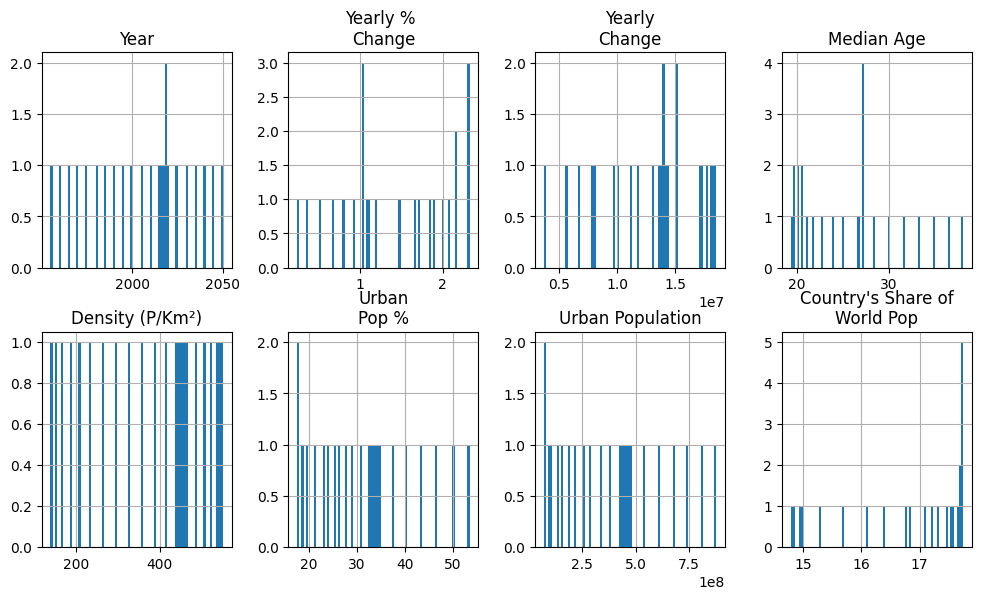

In [34]:
columns = list(df)[0:8]
df[columns].hist(bins=80,figsize=(12,50),layout=(14,4))
plt.show()

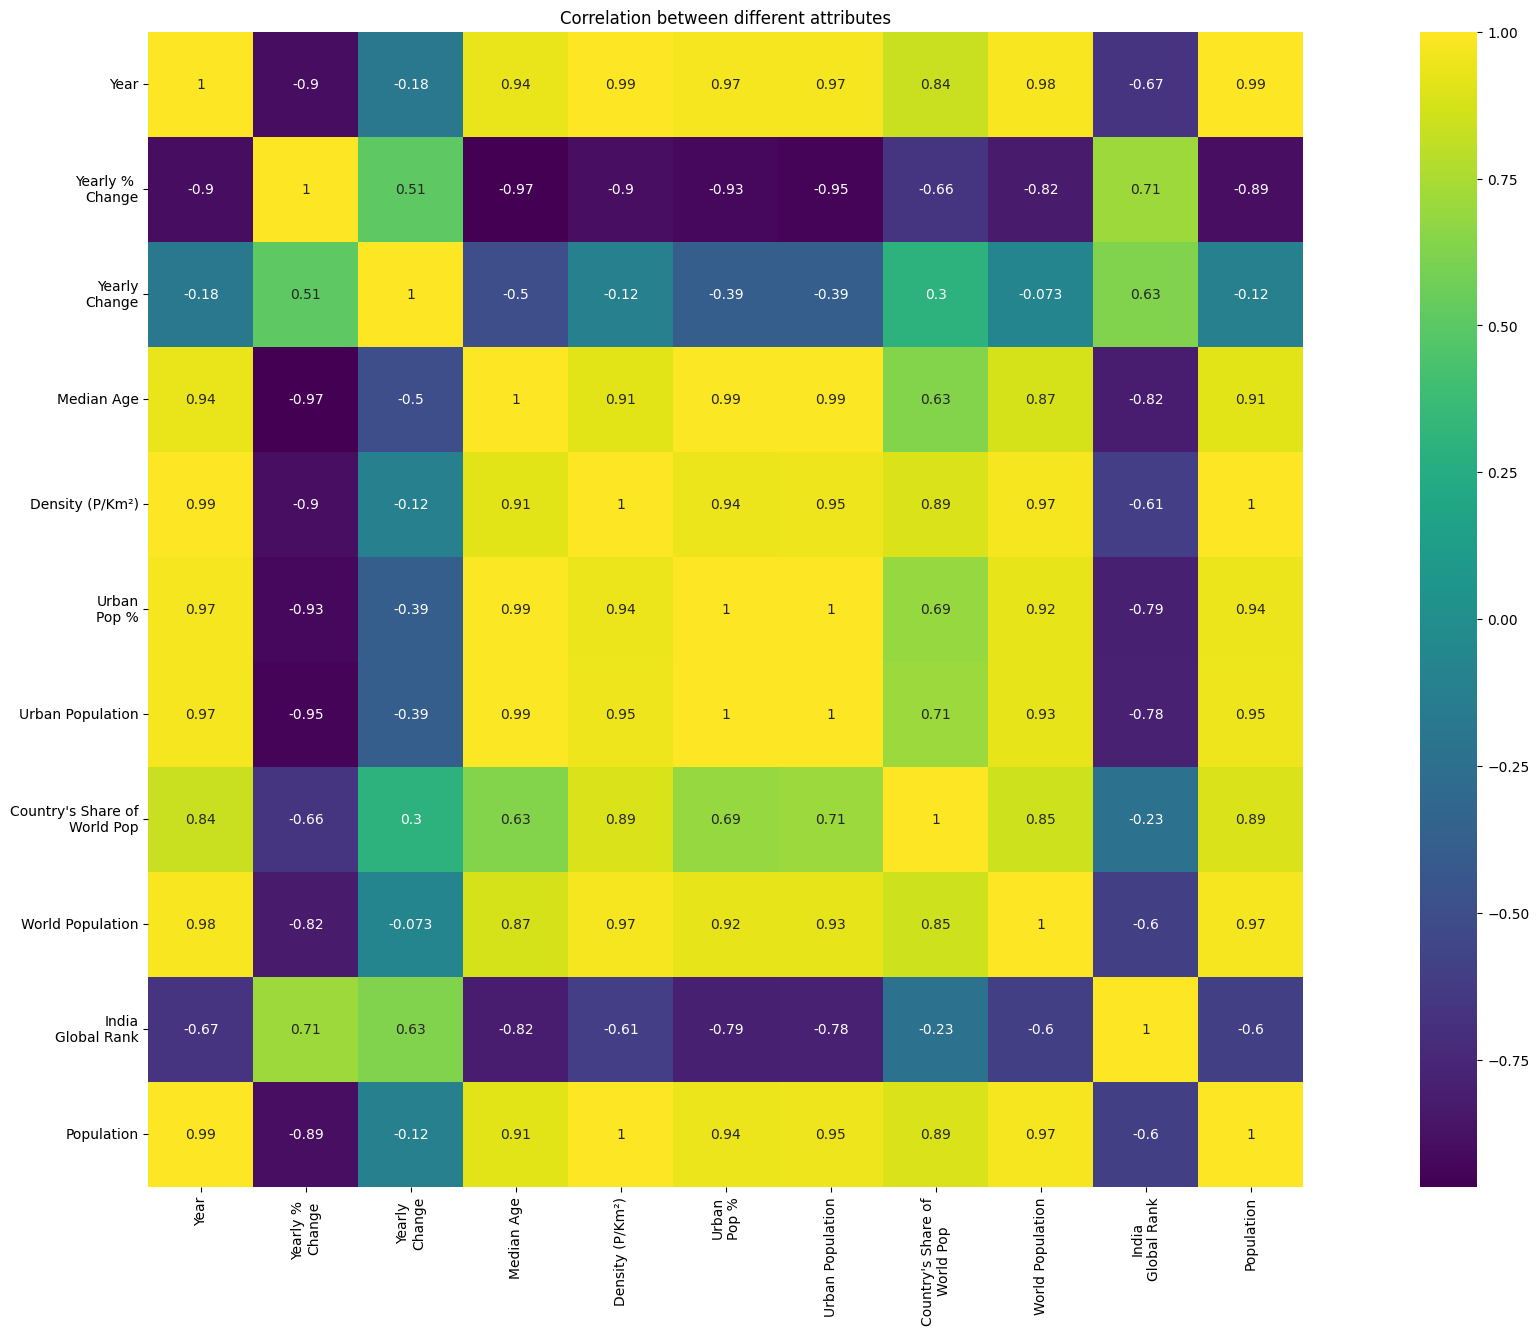

In [35]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),vmax=1,square=True,annot=True,cmap='viridis')
plt.title("Correlation between different attributes")
plt.show()

**SPLITTING DATA**

In [36]:
from sklearn.model_selection import train_test_split

x = df.drop('Population',axis=1)
y = df['Population']

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

**MODEL BUILDING**

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred = model.predict(x_test)

In [40]:
model_score = model.score(x_test,y_test)

In [41]:
model_score

0.999986529106157